## KNN In Medical Industry - Study Case Heart Disease

### Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('heart.csv')

### Sneak Peak Data

In [3]:
#Melihat 5 data teratas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Melihat 5 data terbawah
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Melihat jumlah rows (303) dan jumlah kolom/features (14)
df.shape

(303, 14)

In [6]:
#General information dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Handling Missing Values

In [7]:
#Data sudah clean dan bisa dilanjutkan ke tahap EDA
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

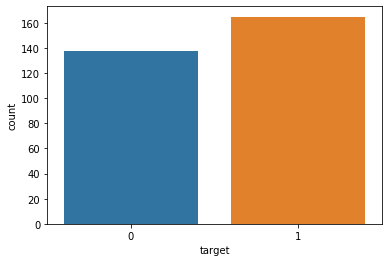

In [8]:
#Univariate analysis target.
sns.countplot(df['target'])

- Sepertinya sudah balance karena jumlah nilai 0 dan 1 tidak berbeda jauh.
- Nilai 0 untuk Heart Disease.
- Nilai 1 untuk No Heart Disease.

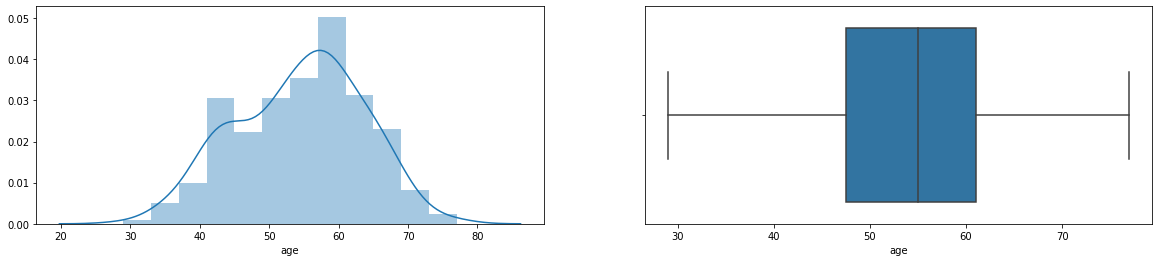

In [9]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['age'])

f.add_subplot(1,2,2)
sns.boxplot(df['age'])

- Dari distplot dapat dilihat bahwa density dari data terletak di kisaran angka 50-60 tahun dan sangat jarang pasien yang berumur 30 tahun kebawah atau 80 tahun keatas.
- Dari boxplot menunjukan bahwa data tidak memiliki outlier.

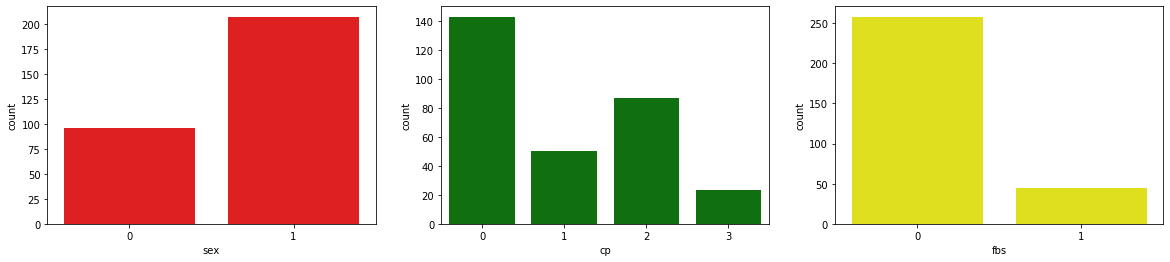

In [10]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

- Pasien male/laki-laki ternyata memiliki jumlah lebih banyak bahkan 2x lipat dari jumlah pasien female/perempuan.
- Paling banyak pasien memiliki tipe cp 0 yaitu typical angine dan paling sedikit bertipe 3 yaitu asymptomatic.
- Grafik diatas menunjukan bahwa nilai fasting blood sugar banyak sekali yang dibawah 120 atau bernilai 0.

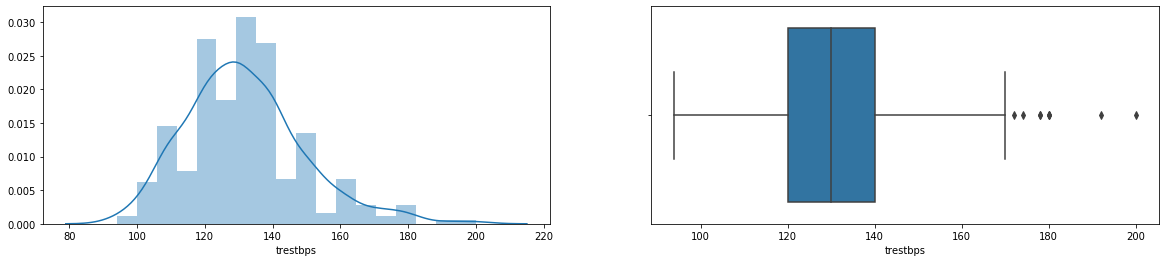

In [11]:
#Univariate analysis resting blood pressure (mm Hg) atau trestbps.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])

f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

- Untuk nilai resting blood pressure atau trestbps paling banyak di angka 120 - 140 mmHg.
- Features trestbps memiliki beberapa outlier.

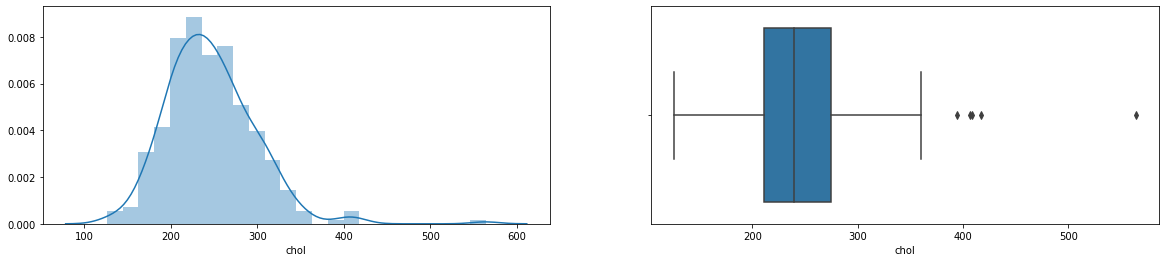

In [12]:
#Univariate analysis serum cholestrol (mg/dl) atau chol.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['chol'])

f.add_subplot(1,2,2)
sns.boxplot(df['chol'])

- Untuk serum cholestrol terpusat di kisaran angka 200-300 mg/dl.
- Features chol memiliki beberapa outlier.

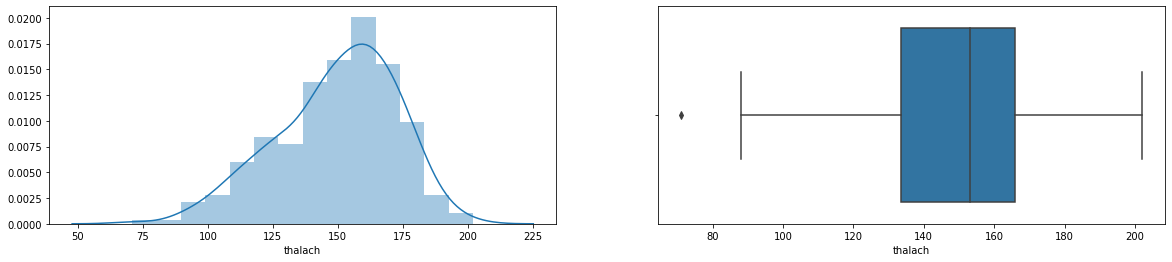

In [13]:
#Univariate analysis maximum heart rate achieved atau thalach.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['thalach'])

f.add_subplot(1,2,2)
sns.boxplot(df['thalach'])

- Distplot menunjukan bahwa nilai dari maxium heart rate atau thalach paling padat di kisaran angka 130 - 175.
- Boxpplot menunjukan bahwa ada 1 outlier yang nilainya dibawah 80.

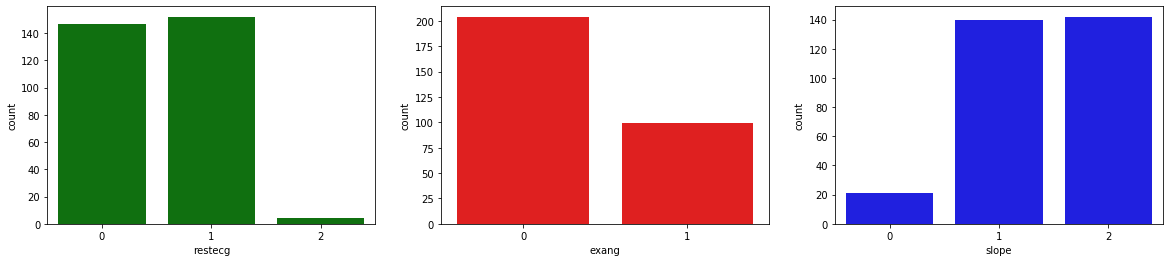

In [14]:
#Univariate analysis resting electrocardiographic results atau restecg.
#0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy.
#Univariate analysis exercise induced angina atau exang.
# 1=yes; 0=no.
#Univariate analysis the slope of the peak exercise ST segment.
#0=upsloping; 1=flat; 2=downsloping.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['restecg'], color='green')

f.add_subplot(1,3,2)
sns.countplot(df['exang'], color='red')

f.add_subplot(1,3,3)
sns.countplot(df['slope'], color='blue')

- Dapat dilihat bahwa nilai 0 dan 1 hampir berimbang tetapi untuk nilai 2 pada features restecg sangat sedikit yaitu dibawah 10.
- Nilai 0 lebih banyak sekitar 2x lipat dari nilai 1 yang berarti yaitu pasien tidak mengalami induced angine saat exercise lebih banyak daripada yang mengalami induced saat exercise.
- Features slope nilai 1 yaitu flat dan 2 yaitu downsloping memiliki nilai yang hampir sama yaitu sekitar 140 dan nilali 0 dimana itu merupakan upsloping mempunyai nilai sangat sedikit yaitu sekitar 20.

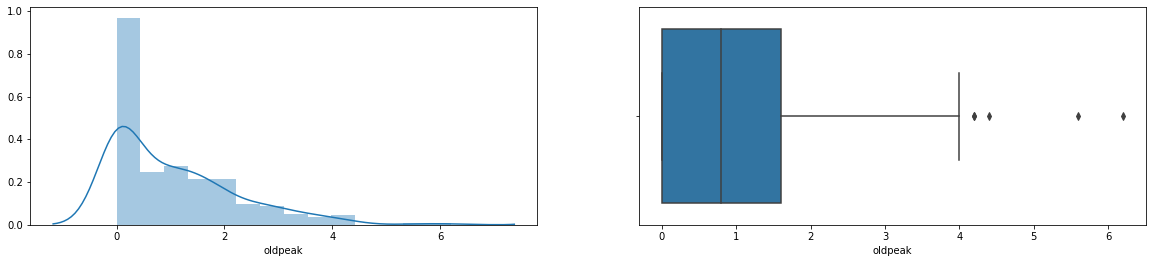

In [15]:
#Univariate analysis ST depression induced by exercise relative to rest.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['oldpeak'])

f.add_subplot(1,2,2)
sns.boxplot(df['oldpeak'])

- Dari distplot dapat dilihat bahwa features oldpeak terpusat di angka 0.
- Features oldpeak memiliki beberapa outlier diatas nilai 4.

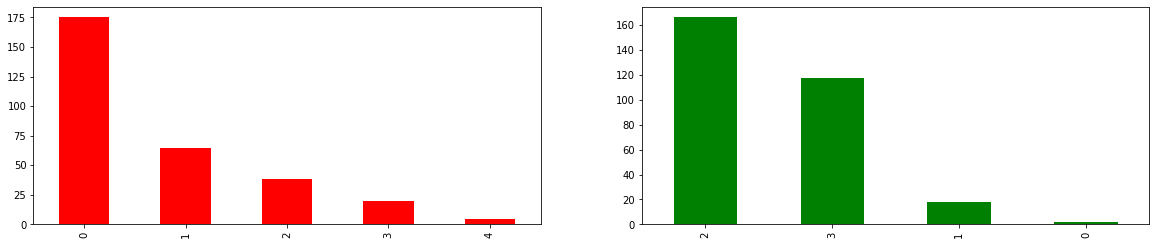

In [16]:
#Univariate analysis ca number of major vessels (0-3) colored by flourosopy.
#Univariate analysis thal.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
df['ca'].value_counts().plot('bar', color='red')

f.add_subplot(1,2,2)
df['thal'].value_counts().plot('bar', color='green')

- Untuk features ca, nilai paling banyak adalah 0 yang memiliki jumlah major vessels sebanyak 0 dan paling sedikit adalah 4.
- Sedangkan untuk features thal sebagian besar di nilai 2 dan paling sedikit adalah nilai 0.

In [17]:
#Mencari nilai korelasi antar features.
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.098,-0.069,0.28,0.21,0.12,-0.12,-0.4,0.097,0.21,-0.17,0.28,0.068,-0.23
sex,-0.098,1,-0.049,-0.057,-0.2,0.045,-0.058,-0.044,0.14,0.096,-0.031,0.12,0.21,-0.28
cp,-0.069,-0.049,1,0.048,-0.077,0.094,0.044,0.3,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.057,0.048,1,0.12,0.18,-0.11,-0.047,0.068,0.19,-0.12,0.1,0.062,-0.14
chol,0.21,-0.2,-0.077,0.12,1,0.013,-0.15,-0.0099,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.12,0.045,0.094,0.18,0.013,1,-0.084,-0.0086,0.026,0.0057,-0.06,0.14,-0.032,-0.028
restecg,-0.12,-0.058,0.044,-0.11,-0.15,-0.084,1,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.14
thalach,-0.4,-0.044,0.3,-0.047,-0.0099,-0.0086,0.044,1,-0.38,-0.34,0.39,-0.21,-0.096,0.42
exang,0.097,0.14,-0.39,0.068,0.067,0.026,-0.071,-0.38,1,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.096,-0.15,0.19,0.054,0.0057,-0.059,-0.34,0.29,1,-0.58,0.22,0.21,-0.43


- Terdapat hubungan linear positif yang cukup kuat antara target dengan cp, thalach, dan slope.
- Sedangkan untuk hubungan linear negatif, target mempunyai hubungan yang kuat dengan exang, oldpeak, ca, dan thal.

### Modelling

In [18]:
#Membuat object KNN
knn = KNeighborsClassifier()

In [19]:
#Membuat variable x dan y
x = df.drop(columns=['target'])
y = df['target']

In [20]:
#Split data kedalam training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [21]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#Predict testing set
y_pred = knn.predict(x_test)

In [23]:
#Check performa model menggunakan classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



In [24]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_test, y_pred)

0.5655555555555556

- Dari classification report dapat dilihat bahwa model memiliki rata-rata performa sekitar 57% mulai dari precision, recall, f1-score, dan support. Accuracy juga menunjukan akurasi 57%.
- Lalu untuk score dari AUC dapat dilihat bahwa nilainya seitar 56,5%
- Hasil ini sangat jauh dibawah algoritma Logistic Regression yang memiliki performa sekitar 89%.

### Hyperparameter Tuning Menggunakan Grid Search

In [25]:
#List Hyperparameters yang akan diuji
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [26]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [27]:
knn_2 = KNeighborsClassifier()

In [28]:
#cv itu cross validation
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [29]:
best_model = clf.fit(x,y)

In [30]:
#Nilai hyperpaameters terbaik
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 5
Best p: 1
Best n_neighbors: 7


In [31]:
y_pred = best_model.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [33]:
roc_auc_score(y_test, y_pred)

0.7627777777777778